In [5]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# String similarity checking
from fuzzywuzzy import fuzz

# Display full dataframe columns/rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)


In [27]:
#understanding the dataset 
import pandas as pd

# Load dataset
df = pd.read_csv('zomato.csv')

# Optional: Set display options for cleaner output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 1000)

# Display the first 5 rows with selected columns
columns_to_show = [
    'url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
    'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
    'approx_cost(for two people)', 'reviews_list',
    'listed_in(type)', 'listed_in(city)'
]

# Subset DataFrame and display
df_display = df[columns_to_show].head(5)
df_display


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0...,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0Iiw...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Banga...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Bir...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for dinner with family. Turned out to be a good choose su...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MD...,"1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that good enough and it's not a pocket friendly cafe an...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi-bhojana-banashankari?context=eyJzZSI6eyJlIjpbIjU4...,"1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper Karnataka style full meals. Been there twice and ...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village-basavanagudi?context=eyJzZSI6eyJlIjpbIjU4Njk0Iiwi...,"10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi,...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant in neighbourhood. Buffet system is properly arrang...",Buffet,Banashankari


In [5]:
import pandas as pd
df = pd.read_csv('zomato.csv')


In [9]:
df.shape


(51717, 17)

In [11]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list', 'listed_in(city)'], axis=1, inplace=True)
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [17]:
#dropping duplicates 
df.drop_duplicates(inplace=True)
df.shape


(35011, 10)

In [19]:
#cleaning rate column
df['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
#### Removing 'NEW','-' and '/5' from rate column
import numpy as np  # Make sure this is at the top

def handle_rate(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

df['rate'] = df['rate'].apply(handle_rate)
df['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [25]:
df['rate'].isnull().sum()

5097

In [37]:
df['rate'] = df['rate'].fillna(df['rate'].mean())  # ✅ Safe and compatible
df['rate'].isnull().sum()


0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35011 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35011 non-null  object 
 1   online_order                 35011 non-null  object 
 2   book_table                   35011 non-null  object 
 3   rate                         35011 non-null  float64
 4   votes                        35011 non-null  int64  
 5   location                     34997 non-null  object 
 6   rest_type                    34855 non-null  object 
 7   cuisines                     34978 non-null  object 
 8   approx_cost(for two people)  34790 non-null  object 
 9   listed_in(type)              35011 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ MB


In [41]:
### Dropping Null Values from all columns
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [43]:
### Renaming columns for usability
df.rename(columns = {'approx_cost(for two people)': 'cost2plates','listed_in(type)':'type'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [45]:
### Cleaning 'cost2plates' Column
df['cost2plates'].unique

<bound method Series.unique of 0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: cost2plates, Length: 34636, dtype: object>

In [51]:
#### Removing ',' from 'cost2plate' column
def handle_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

df['cost2plates'] = df['cost2plates'].apply(handle_comma)
df['cost2plates'].head()


0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost2plates, dtype: float64

In [53]:
df['cost2plates'].tail()

51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost2plates, dtype: float64

In [57]:
## Cleaning 'rest_type' Column
rest_types = df['rest_type'].value_counts()
rest_types

rest_type
Quick Bites                   12123
Casual Dining                  7533
Cafe                           2578
Delivery                       1502
Dessert Parlor                 1491
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [59]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Casual Dining, Bar            949
Bakery                        736
Beverage Shop                 487
Bar                           473
Food Court                    424
                             ... 
Pop Up                          1
Quick Bites, Kiosk              1
Mess, Quick Bites               1
Dessert Parlor, Food Court      1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 87, dtype: int64

In [63]:
### Making rest_types less 1000 frequency as others
def handle_rest_type(value):
    if value in rest_types_lessthan1000:
        return 'others'
    else:
        return value
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           12123
others                 8193
Casual Dining          7533
Cafe                   2578
Delivery               1502
Dessert Parlor         1491
Takeaway, Delivery     1216
Name: count, dtype: int64

In [65]:
locations = df['location'].value_counts()
locations

location
BTM                     2484
Whitefield              1945
HSR                     1753
Indiranagar             1747
Marathahalli            1649
                        ... 
Yelahanka                  5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: count, Length: 93, dtype: int64

In [67]:
## Cleaning 'location' column
locations_lessthan300 = locations[locations<300]
locations_lessthan300

location
Cunningham Road                  287
Jeevan Bhima Nagar               258
Shanti Nagar                     258
St. Marks Road                   242
Bommanahalli                     180
Vasanth Nagar                    180
Thippasandra                     173
Basaveshwara Nagar               173
Shivajinagar                     167
Commercial Street                164
Ejipura                          157
Koramangala 8th Block            144
Kumaraswamy Layout               131
Koramangala 3rd Block            129
Wilson Garden                    128
Majestic                         119
Nagawara                         117
Seshadripuram                    115
Hennur                           106
ITPL Main Road, Whitefield       102
HBR Layout                       100
Varthur Main Road, Whitefield     99
Yeshwantpur                       95
Race Course Road                  94
Infantry Road                     84
City Market                       83
Kaggadasapura                

In [69]:
## Making locations less 300 frequency as others
def handle_location(value):
    if value in locations_lessthan300:
        return 'others'
    else:
        return value
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
others                   4838
BTM                      2484
Whitefield               1945
HSR                      1753
Indiranagar              1747
Marathahalli             1649
Koramangala 5th Block    1605
JP Nagar                 1400
Jayanagar                1242
Electronic City          1212
Bellandur                1120
Bannerghatta Road        1052
Sarjapur Road             933
Brigade Road              687
Koramangala 7th Block     624
Brookefield               598
Koramangala 6th Block     590
Koramangala 4th Block     587
Kalyan Nagar              584
New BEL Road              582
Banashankari              571
Malleshwaram              556
MG Road                   554
Ulsoor                    546
Koramangala 1st Block     539
Frazer Town               469
Basavanagudi              463
Rajajinagar               462
Church Street             446
Banaswadi                 427
Residency Road            423
Kammanahalli              417
Old Airport Road          401
L

In [71]:
cuisines = df['cuisines'].value_counts()
cuisines

cuisines
North Indian                                   1895
North Indian, Chinese                          1561
South Indian                                   1172
Bakery, Desserts                                591
Biryani                                         557
                                               ... 
Salad, Juices                                     1
Pizza, Italian, Chinese, Rolls, Biryani           1
Burger, Juices                                    1
North Indian, Fast Food, Biryani, Beverages       1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2704, dtype: int64

In [73]:
cuisines_lessthan100 = cuisines[cuisines<100]
cuisines_lessthan100

cuisines
Cafe, Desserts                                 99
Fast Food, Burger                              97
North Indian, Street Food                      96
North Indian, Continental                      95
North Indian, Chinese, Continental             82
                                               ..
Salad, Juices                                   1
Pizza, Italian, Chinese, Rolls, Biryani         1
Burger, Juices                                  1
North Indian, Fast Food, Biryani, Beverages     1
North Indian, Chinese, Arabian, Momos           1
Name: count, Length: 2651, dtype: int64

In [75]:
def handle_cuisines(value):
    if value in cuisines_lessthan100:
        return 'others'
    else:
        return value
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                              19621
North Indian                                         1895
North Indian, Chinese                                1561
South Indian                                         1172
Bakery, Desserts                                      591
Biryani                                               557
Fast Food                                             485
South Indian, North Indian, Chinese                   475
Desserts                                              447
Cafe                                                  447
Bakery                                                385
Chinese                                               337
Ice Cream, Desserts                                   304
Mithai, Street Food                                   256
Chinese, North Indian                                 249
North Indian, Chinese, Biryani                        234
Desserts, Ice Cream                                   226
North

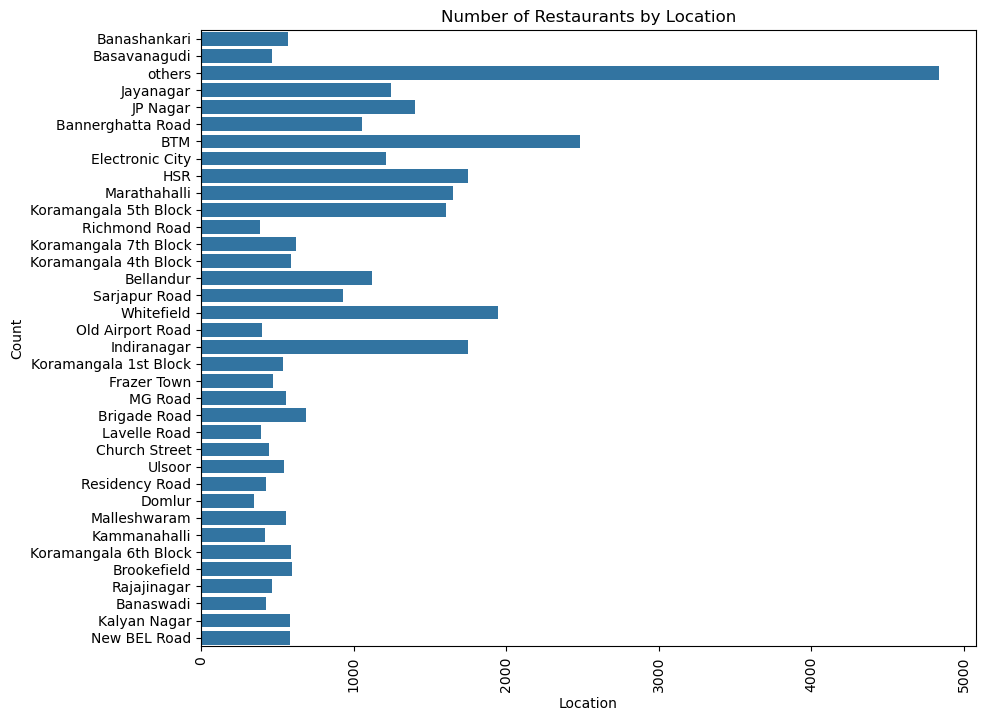

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of restaurants by location
plt.figure(figsize=(10,8))
ax = sns.countplot(df['location'])  # Make sure you’re using the correct DataFrame (df)
plt.xticks(rotation=90)
plt.title('Number of Restaurants by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


C:\Users\ANKITHA S\AppData\Local\Temp\ipykernel_5412\2972761244.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order', data=df, palette='inferno', legend=False)


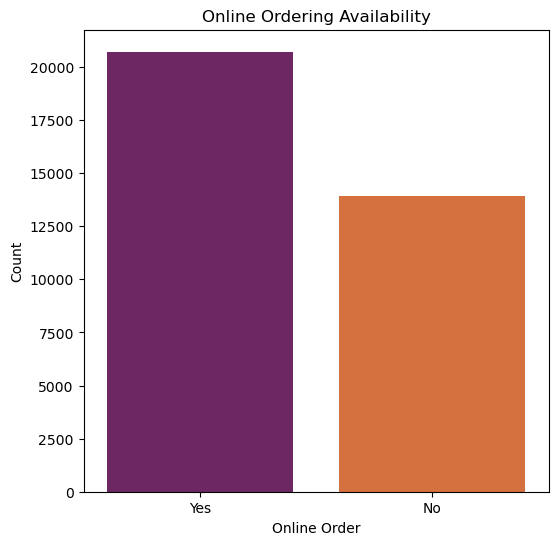

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.countplot(x='online_order', data=df, palette='inferno', legend=False)
plt.title('Online Ordering Availability')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()
#palette='inferno' is used to color multiple bars differently
#which is typically done when you split by a subgroup (e.g. hue='city')
#But you're only plotting a single variable, so Seaborn gives a FutureWarning


C:\Users\ANKITHA S\AppData\Local\Temp\ipykernel_5412\1819958607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='book_table', data=df, palette='rainbow')


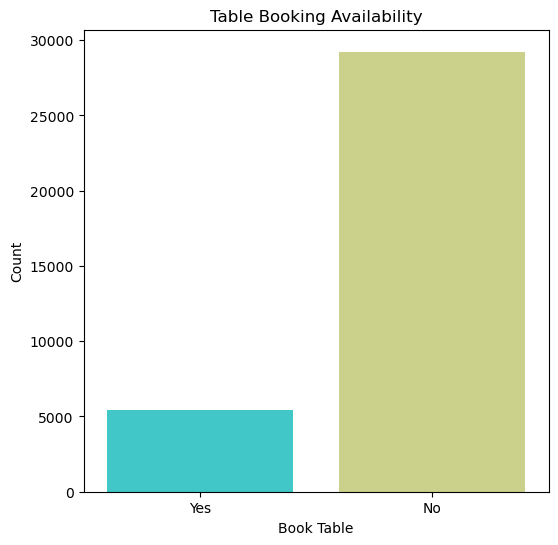

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.countplot(x='book_table', data=df, palette='rainbow')
plt.title('Table Booking Availability')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.show()
#palette='inferno' is used to color multiple bars differently
#which is typically done when you split by a subgroup (e.g. hue='table booking')
#But you're only plotting a single variable, so Seaborn gives a FutureWarning


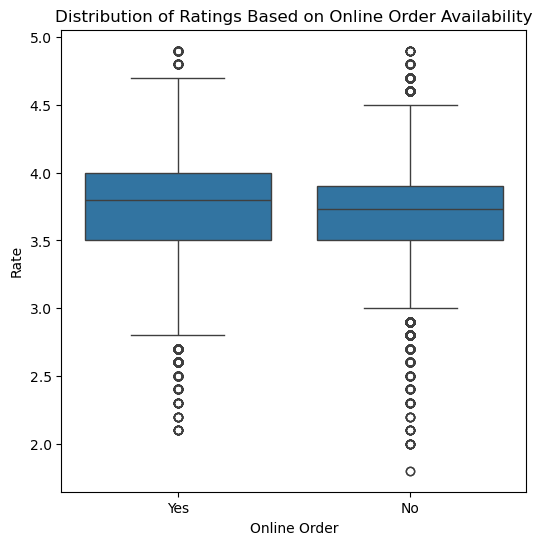

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=df)  # ✅ fixed 'data='
plt.title('Distribution of Ratings Based on Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Rate')
plt.show()


<Axes: xlabel='book_table', ylabel='rate'>

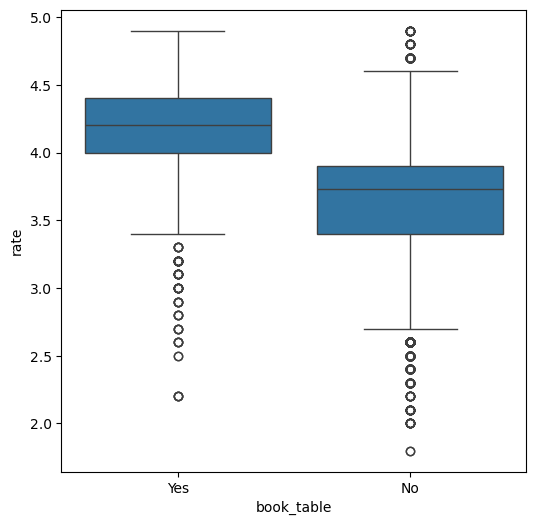

In [115]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df)

In [127]:
import pandas as pd

# Load dataset
df = pd.read_csv('zomato.csv')

# Group by location and online_order, count restaurants
data1 = df.groupby(['location', 'online_order'])['name'].count().reset_index()
data1.rename(columns={'name': 'count'}, inplace=True)

# Ensure all combinations appear using pivot with fill_value=0
pivot_table = pd.pivot_table(
    data1,
    values='count',
    index='location',
    columns='online_order',
    fill_value=0,
    aggfunc='sum'
)

# Optional: Reset index if you want it as a flat DataFrame
pivot_table = pivot_table.reset_index()

# Show all rows, not just a truncated view
pd.set_option('display.max_rows', None)

pivot_table


online_order,location,No,Yes
0,BTM,1792,3332
1,Banashankari,397,509
2,Banaswadi,321,343
3,Bannerghatta Road,706,924
4,Basavanagudi,243,441
5,Basaveshwara Nagar,91,100
6,Bellandur,525,761
7,Bommanahalli,123,115
8,Brigade Road,553,665
9,Brookefield,241,417


<Figure size 2600x1400 with 0 Axes>

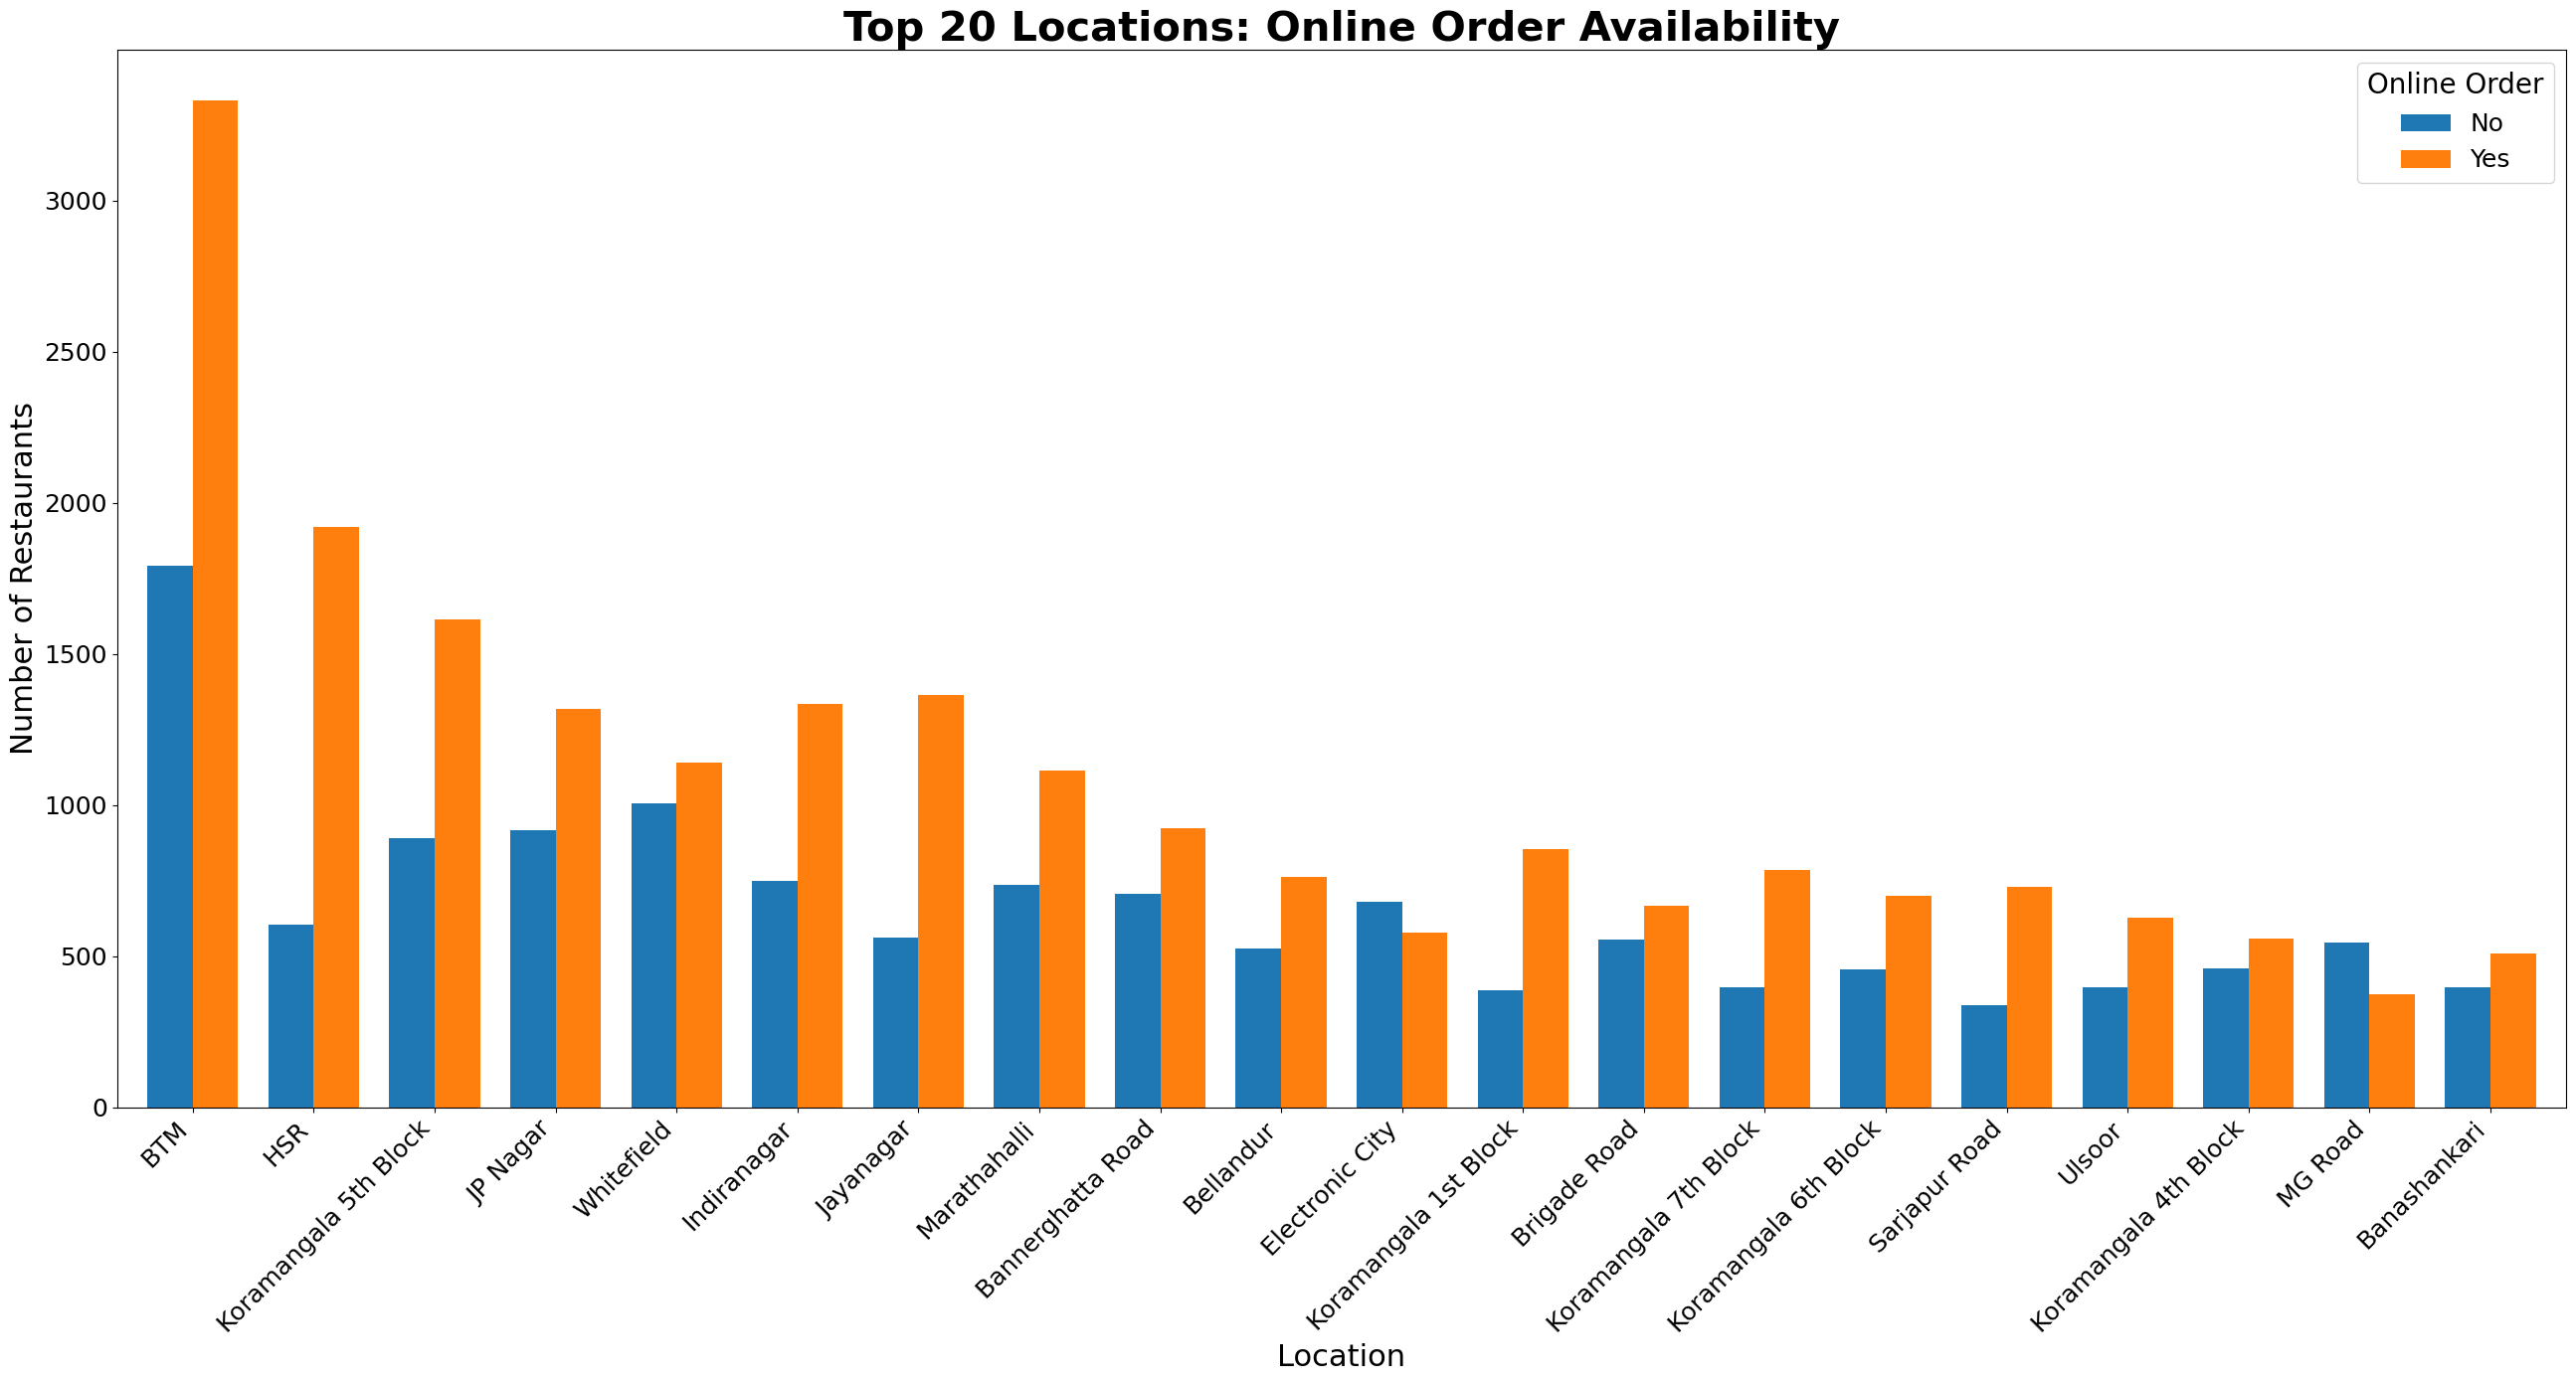

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data1 = pd.read_csv('location_online.csv')

# Rename columns for clarity
data1.columns = ['location', 'online_order', 'count']

# Create pivot table
data_pivot = pd.pivot_table(
    data1,
    values='count',
    index='location',
    columns='online_order',
    fill_value=0,
    aggfunc='sum'
)

# Get top 20 locations
top_20_locations = data_pivot.sum(axis=1).sort_values(ascending=False).head(20).index
data_top20 = data_pivot.loc[top_20_locations]

# Plot with large font sizes
plt.figure(figsize=(26, 14))
ax = data_top20.plot(kind='bar', figsize=(26, 14), width=0.75)

# Title and axis labels
plt.title('Top 20 Locations: Online Order Availability', fontsize=30, weight='bold')
plt.xlabel('Location', fontsize=22)
plt.ylabel('Number of Restaurants', fontsize=22)

# Tick label font sizes
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)

# Legend styling
plt.legend(title='Online Order', title_fontsize=20, fontsize=18)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


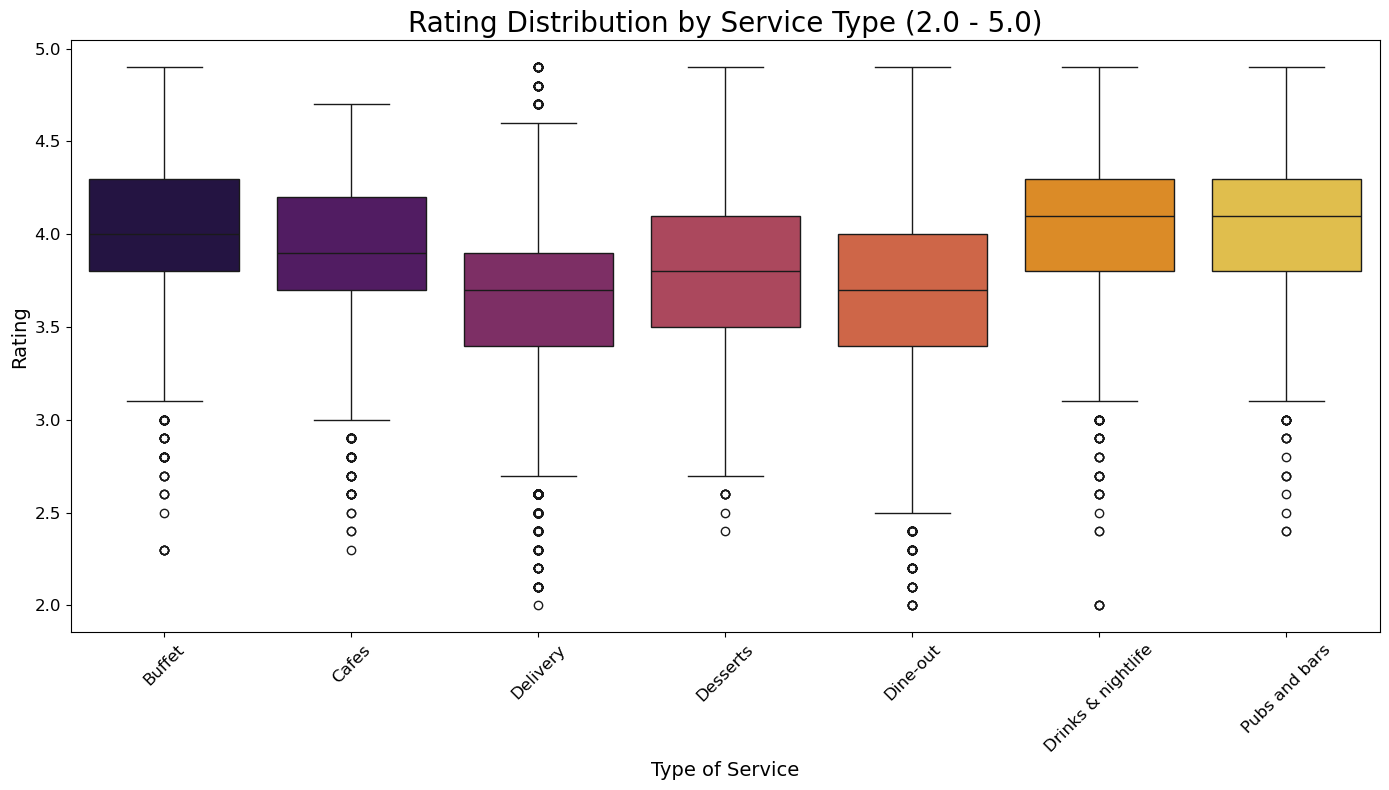

In [188]:
### Visualizing Types of Restaurant vs Rating
plt.figure(figsize=(14, 8))
sns.boxplot(x='listed_in(type)', y='rate', data=filtered_data, hue='listed_in(type)', palette='inferno', dodge=False)
plt.title('Rating Distribution by Service Type (2.0 - 5.0)', fontsize=20)
plt.xlabel('Type of Service', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)  # optional: hides legend
plt.tight_layout()
plt.show()


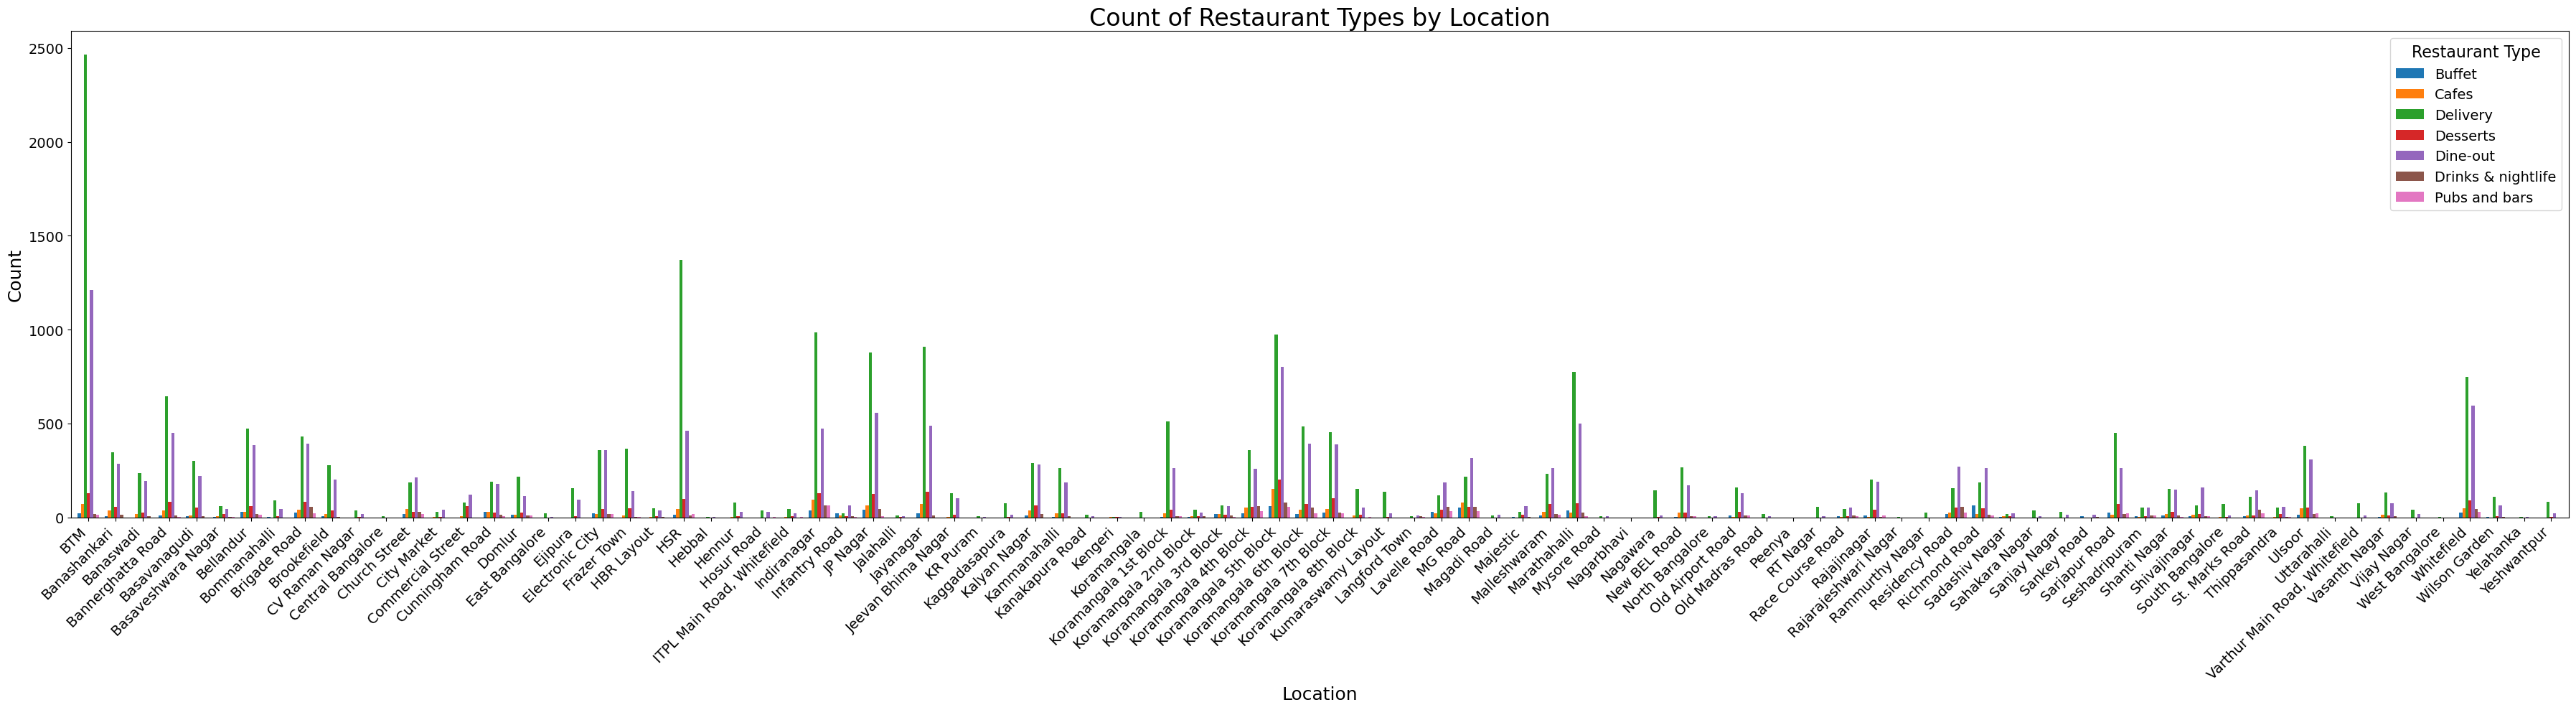

In [230]:
## Grouping Type of Restaurant location wise
import matplotlib.pyplot as plt

# Plot
ax = data3.plot(kind='bar', figsize=(36, 10), width=0.8)

# Title and axis labels
plt.title('Count of Restaurant Types by Location', fontsize=24)
plt.xlabel('Location', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add legend with larger font
plt.legend(title='Restaurant Type', fontsize=14, title_fontsize=16)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


In [232]:
## Number of Votes location wise
data4 = data[['location','votes']]
data4.drop_duplicates()
data5 = data4.groupby(['location'])['votes'].sum()
data5 = data5.to_frame()
data5 = data5.sort_values('votes',ascending=False)
data5.head()

,votes
location,
Koramangala 5th Block,2219506
Indiranagar,1196007
Koramangala 4th Block,685156
BTM,617880
Church Street,594979


C:\Users\ANKITHA S\AppData\Local\Temp\ipykernel_5412\3278630071.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data5.index, y=data5['votes'], palette=colors)


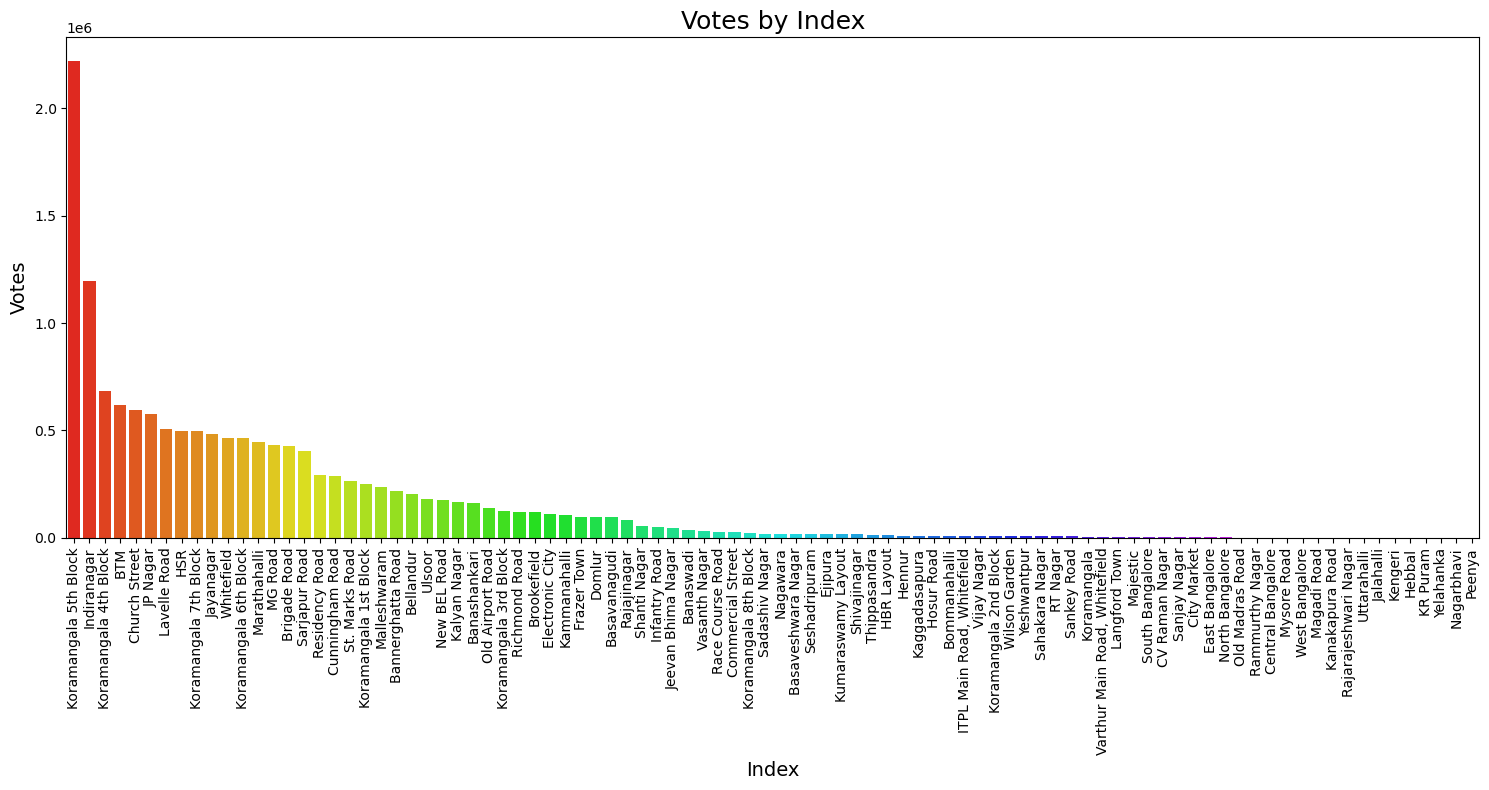

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Generate rainbow color palette based on the number of bars
colors = sns.color_palette("hsv", len(data5))

# Corrected barplot with x and y as keyword arguments
sns.barplot(x=data5.index, y=data5['votes'], palette=colors)

# Customize ticks and layout
plt.xticks(rotation=90)
plt.title("Votes by Index", fontsize=18)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Votes", fontsize=14)

plt.tight_layout()
plt.show()


In [244]:
## Visualizing Top Cuisines
data6 = data[['cuisines','votes']]
data6.drop_duplicates()
data7 = data6.groupby(['cuisines'])['votes'].sum()
data7 = data7.to_frame()
data7 = data7.sort_values('votes',ascending=False)
data7.head()

,votes
cuisines,
North Indian,558650
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930


In [246]:
data7 = data7.iloc[1:,:]
data7.head()

,votes
cuisines,
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930
South Indian,161661
